In [161]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [162]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [163]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [164]:
df['Date'] = pd.to_datetime(df['date'])

In [165]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [166]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [167]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [168]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [169]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [170]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [171]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [173]:
OTG1= df[(df['city'] == 'Mumbai') & (df['product'] == 'Oven Toaster Grill')]

In [174]:
OTG1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Oven Toaster Grill,11-01-2017,Mumbai,614997
2017-12-01,Oven Toaster Grill,12-01-2017,Mumbai,2103019
2018-01-01,Oven Toaster Grill,01-01-2018,Mumbai,1708193
2018-02-01,Oven Toaster Grill,02-01-2018,Mumbai,831972
2018-03-01,Oven Toaster Grill,03-01-2018,Mumbai,1077551


In [175]:
OTG1.shape

(48, 4)

In [176]:
OTG= OTG1.drop('date', axis = 1)

In [177]:
OTG.head()

,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Mumbai,636594
2014-05-01,Oven Toaster Grill,Mumbai,918205
2014-06-01,Oven Toaster Grill,Mumbai,696779
2014-07-01,Oven Toaster Grill,Mumbai,879976
2014-08-01,Oven Toaster Grill,Mumbai,933985


In [178]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

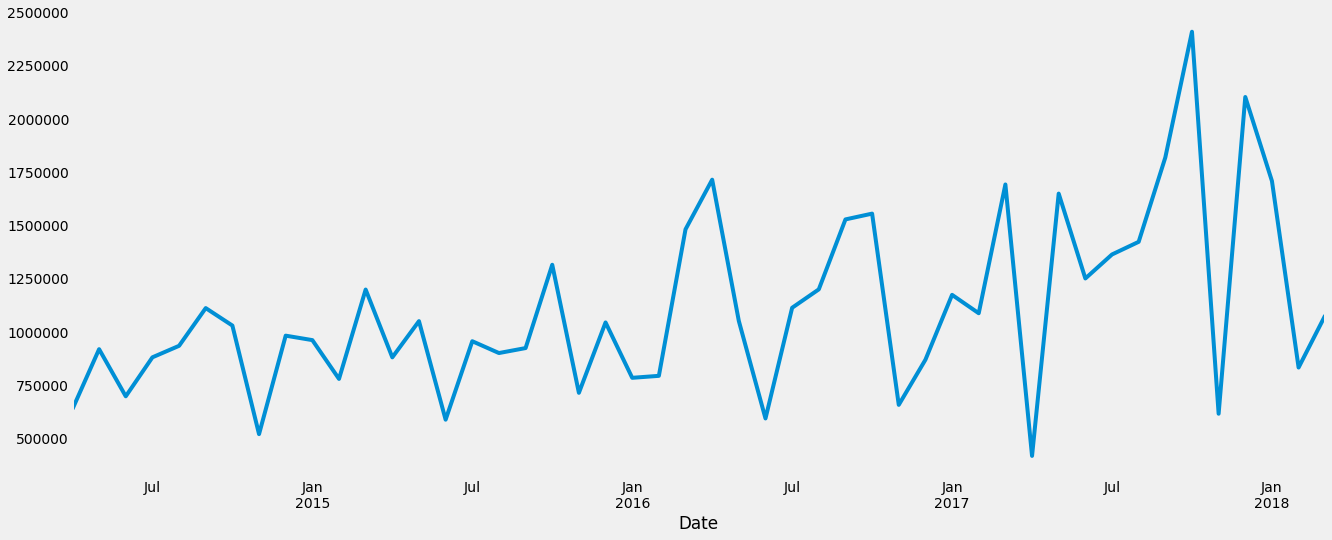

In [179]:
OTG['sales'].plot()
plt.grid();

In [180]:
OTG.sort_index(inplace= True)

In [181]:
OTG.head()

,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Mumbai,636594
2014-05-01,Oven Toaster Grill,Mumbai,918205
2014-06-01,Oven Toaster Grill,Mumbai,696779
2014-07-01,Oven Toaster Grill,Mumbai,879976
2014-08-01,Oven Toaster Grill,Mumbai,933985


In [182]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

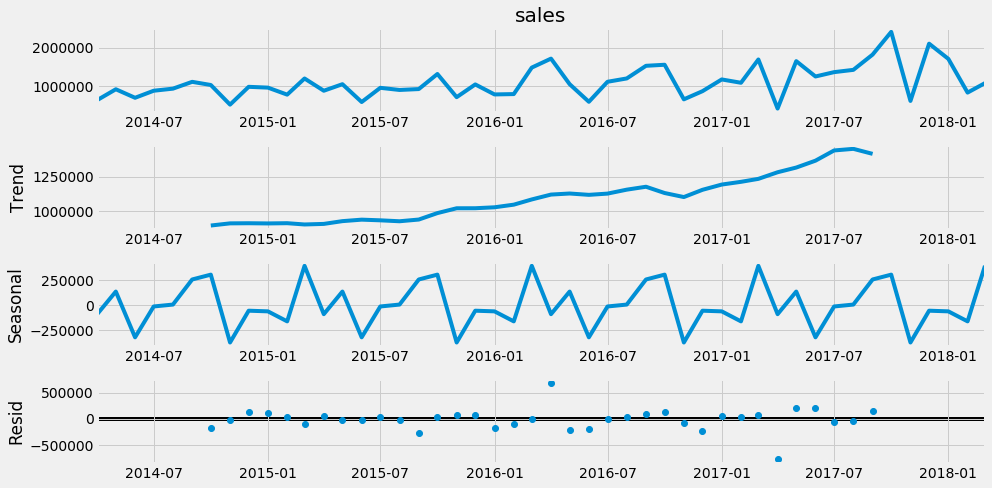

In [183]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(OTG['sales'],model='additive')
decomposition.plot();

In [184]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    897175.000000
2014-11-01    912799.708333
2014-12-01    913714.625000
2015-01-01    912292.083333
2015-02-01    914031.375000
2015-03-01    904795.583333
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -91479.112269
2014-05-01    134184.804398
2014-06-01   -322597.890046
2014-07-01    -14738.612269
2014-08-01      4234.040509
2014-09-01    254622.359954
2014-10-01    302910.290509
2014-11-01   -374257.723380
2014-12-01    -56987.112269
2015-01-01    -63457.028935
2015-02-01   -163426.195602
2015-03-01    390992.179398
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -170912.290509
2014-11-01    -19464.

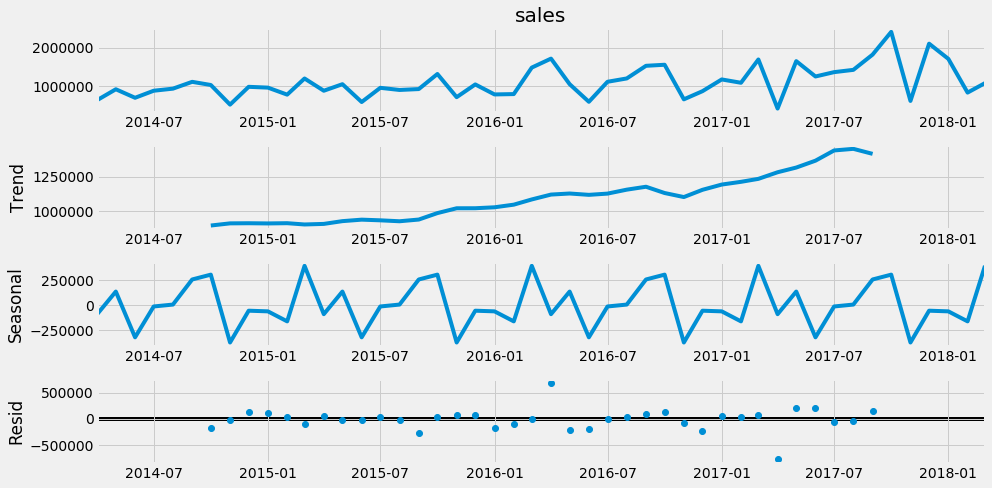

In [185]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(OTG['sales'],model='Multiplicative')
decomposition.plot();

In [186]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    897175.000000
2014-11-01    912799.708333
2014-12-01    913714.625000
2015-01-01    912292.083333
2015-02-01    914031.375000
2015-03-01    904795.583333
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -91479.112269
2014-05-01    134184.804398
2014-06-01   -322597.890046
2014-07-01    -14738.612269
2014-08-01      4234.040509
2014-09-01    254622.359954
2014-10-01    302910.290509
2014-11-01   -374257.723380
2014-12-01    -56987.112269
2015-01-01    -63457.028935
2015-02-01   -163426.195602
2015-03-01    390992.179398
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -170912.290509
2014-11-01    -19464.

In [187]:
OTG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [188]:
train    =   OTG[0:int(len(OTG)*0.7)] 
test     =  OTG[int(len(OTG)*0.7):]

In [189]:
train.shape

(33, 3)

In [190]:
test.shape

(15, 3)

In [191]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Mumbai,636594
2014-05-01,Oven Toaster Grill,Mumbai,918205
2014-06-01,Oven Toaster Grill,Mumbai,696779
2014-07-01,Oven Toaster Grill,Mumbai,879976
2014-08-01,Oven Toaster Grill,Mumbai,933985


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Oven Toaster Grill,Mumbai,1199250
2016-09-01,Oven Toaster Grill,Mumbai,1527810
2016-10-01,Oven Toaster Grill,Mumbai,1555027
2016-11-01,Oven Toaster Grill,Mumbai,656638
2016-12-01,Oven Toaster Grill,Mumbai,868642


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Oven Toaster Grill,Mumbai,1173440
2017-02-01,Oven Toaster Grill,Mumbai,1087030
2017-03-01,Oven Toaster Grill,Mumbai,1692020
2017-04-01,Oven Toaster Grill,Mumbai,416915
2017-05-01,Oven Toaster Grill,Mumbai,1649181


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Oven Toaster Grill,Mumbai,614997
2017-12-01,Oven Toaster Grill,Mumbai,2103019
2018-01-01,Oven Toaster Grill,Mumbai,1708193
2018-02-01,Oven Toaster Grill,Mumbai,831972
2018-03-01,Oven Toaster Grill,Mumbai,1077551


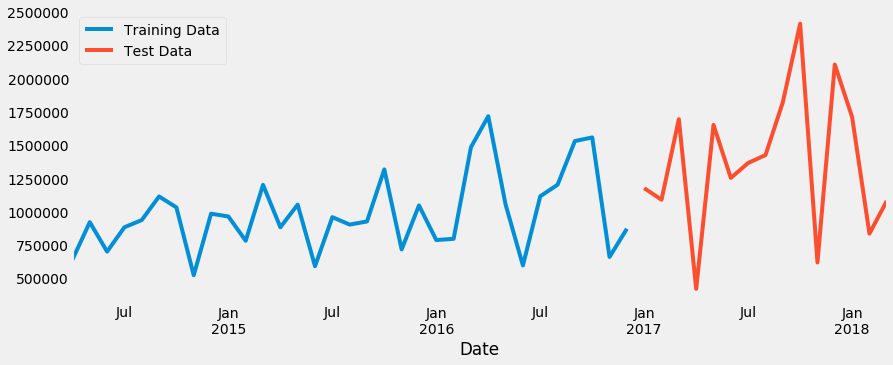

In [192]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [193]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [194]:
from sklearn import metrics

Simpleaverage

In [195]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [196]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Oven Toaster Grill,Mumbai,1173440,980248.606061
2017-02-01,Oven Toaster Grill,Mumbai,1087030,980248.606061
2017-03-01,Oven Toaster Grill,Mumbai,1692020,980248.606061
2017-04-01,Oven Toaster Grill,Mumbai,416915,980248.606061
2017-05-01,Oven Toaster Grill,Mumbai,1649181,980248.606061


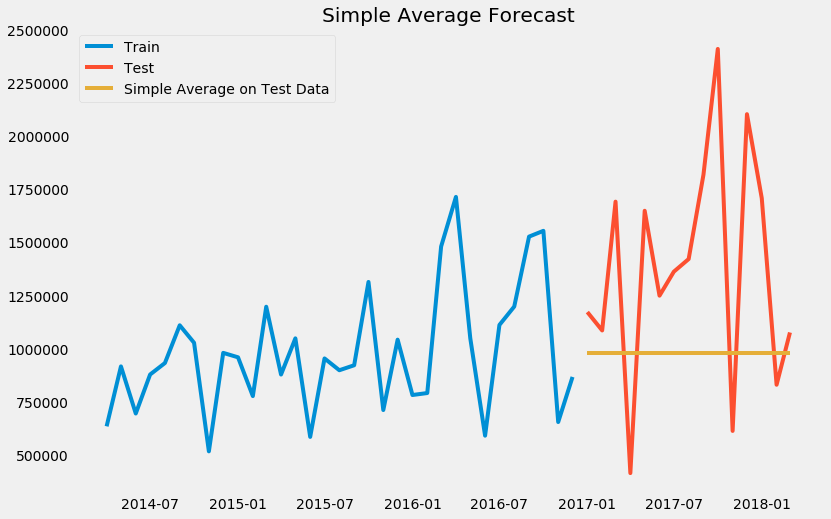

In [197]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [198]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 655066.859


In [199]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,655066.858867


In [200]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [201]:
SES_train = train.copy()
SES_test = test.copy()

In [202]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [203]:
model_SES_autofit = model_SES.fit(optimized=True)

In [204]:
model_SES_autofit.params

{'smoothing_level': 0.16616279069767442,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 636594.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [205]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Oven Toaster Grill,Mumbai,1173440,1.074826e+06
2017-02-01,Oven Toaster Grill,Mumbai,1087030,1.074826e+06
2017-03-01,Oven Toaster Grill,Mumbai,1692020,1.074826e+06
2017-04-01,Oven Toaster Grill,Mumbai,416915,1.074826e+06
2017-05-01,Oven Toaster Grill,Mumbai,1649181,1.074826e+06


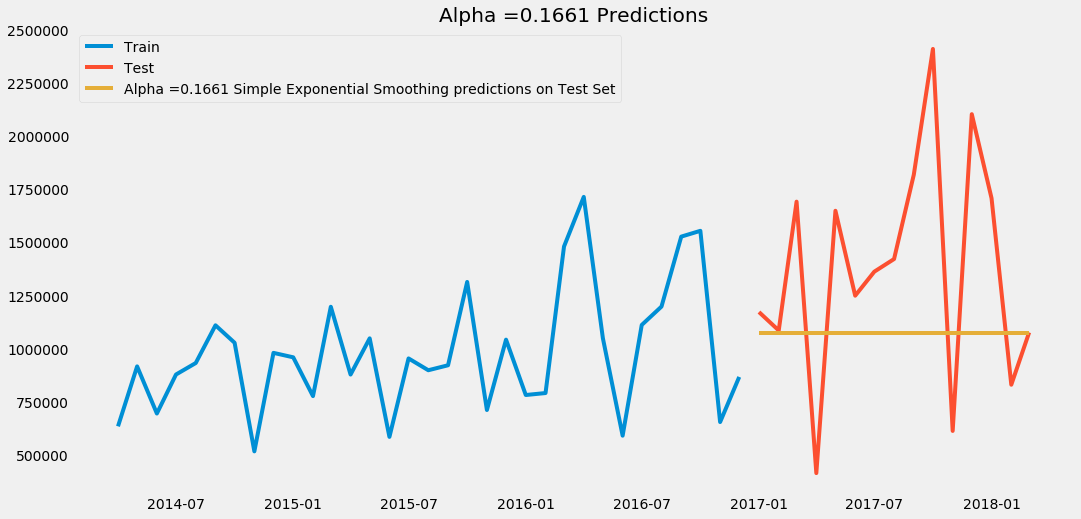

In [206]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.1661 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1661 Predictions');

In [208]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.1661 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.1661 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 602882.754


In [209]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [210]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 38.9832033588454


In [211]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.1661,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,655066.858867,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203


In [212]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [213]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [214]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
1,0.2,302161.597455,603475.647309
0,0.1,308390.881752,617088.720229
2,0.3,308238.168038,617742.079185
3,0.4,316341.254906,641485.597493
4,0.5,324621.123227,668971.377519
5,0.6,332651.136917,695987.289291
6,0.7,340559.403890,718474.536147
7,0.8,348780.112653,732796.002455
8,0.9,357890.148578,736317.339922


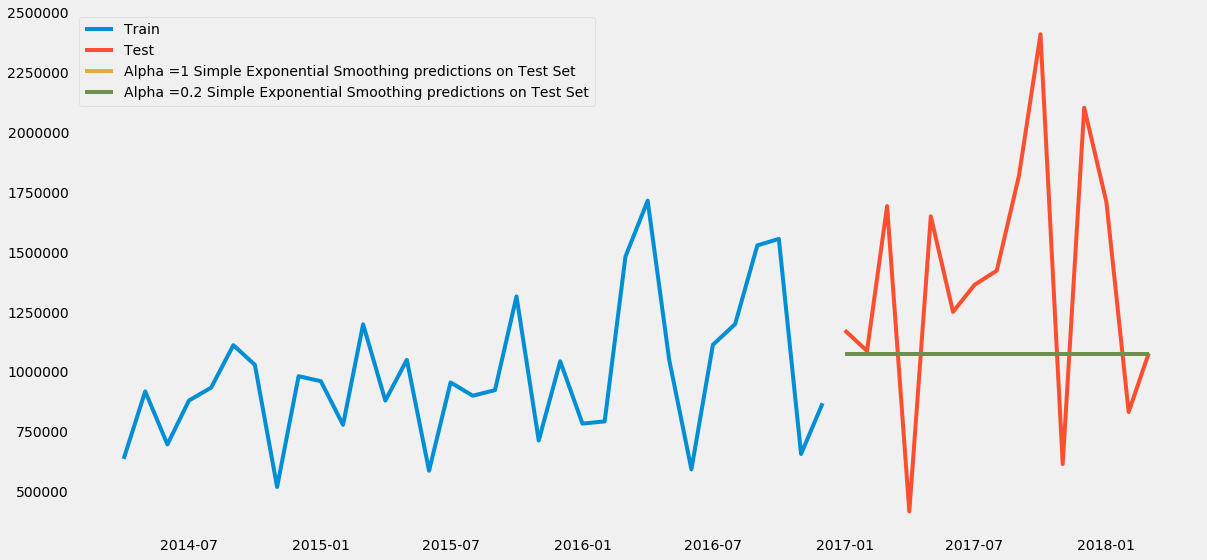

In [216]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [217]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1
                                                                ])
print('\nMAPE:',mape)


MAPE: 39.523561598918796


In [218]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,655066.858867,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",603475.647309,39.523562


Double

In [219]:
DES_train = train.copy()
DES_test = test.copy()

In [220]:
model_DES = Holt(DES_train['sales'])

In [221]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [222]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [223]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.078228e+06,6.304335e+05
1,0.1,0.2,7.845961e+05,8.758892e+05
2,0.1,0.3,6.750830e+05,5.328358e+05
3,0.1,0.4,6.054497e+05,6.433560e+05
4,0.1,0.5,5.583375e+05,6.186720e+05
...,...,...,...,...
95,1.0,0.6,4.912900e+05,1.243490e+06
96,1.0,0.7,5.146375e+05,9.388973e+05
97,1.0,0.8,5.398304e+05,5.895411e+05
98,1.0,0.9,5.674068e+05,7.623655e+05


In [224]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
5,0.1,0.6,523402.705769,527973.956244
2,0.1,0.3,675082.951815,532835.820084
11,0.2,0.2,480114.337763,556678.680554
12,0.2,0.3,430900.000188,579216.974988
10,0.2,0.1,603984.018008,581776.704177


In [225]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.6])
print('\nMAPE:',mape)


MAPE: 45.4212190790466


In [227]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,655066.858867,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",603475.647309,39.523562
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219


In [228]:
TES_train = train.copy()
TES_test = test.copy()

In [229]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

In [230]:
model_TES_autofit = model_TES.fit()

In [231]:
model_TES_autofit.params

{'smoothing_level': 0.07571428571428572,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 897296.3888888883,
 'initial_trend': 3525.0027777778305,
 'initial_seasons': array([0.99143385, 1.15763666, 0.63985615, 1.04699927, 0.99336941,
        1.00573733, 1.17481836, 0.58239253, 1.10034767, 1.07861231,
        0.87235504, 1.35644143]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [232]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Oven Toaster Grill,Mumbai,1173440,1.180140e+06
2017-02-01,Oven Toaster Grill,Mumbai,1087030,9.575693e+05
2017-03-01,Oven Toaster Grill,Mumbai,1692020,1.493761e+06
2017-04-01,Oven Toaster Grill,Mumbai,416915,1.095343e+06
2017-05-01,Oven Toaster Grill,Mumbai,1649181,1.282967e+06


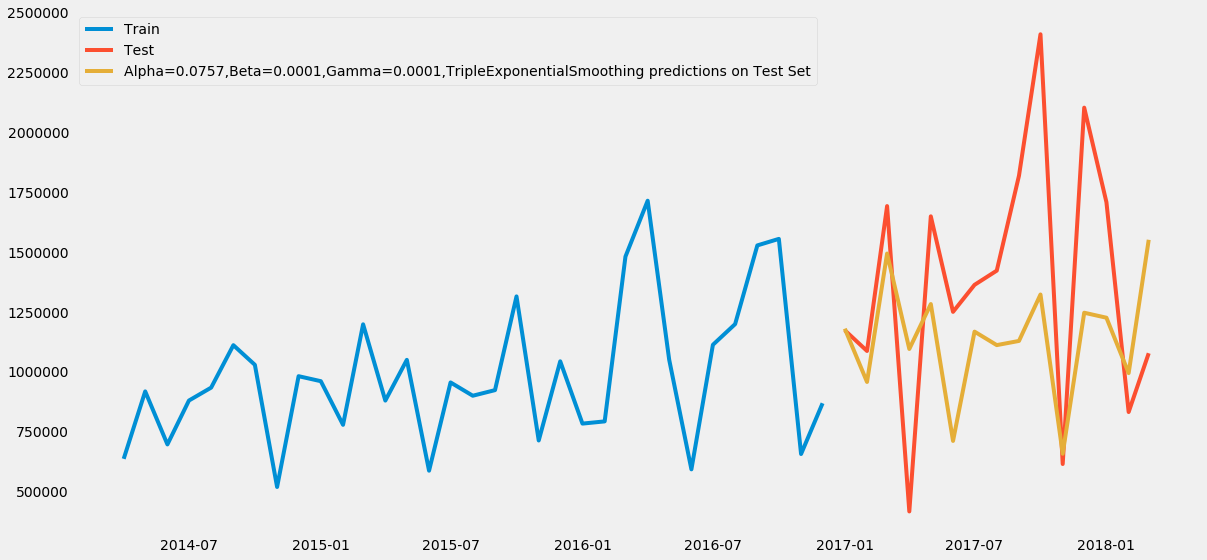

In [233]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [234]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.0757,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.0757,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 513241.397


In [235]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 34.05881271707872


In [236]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,655066.858867,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",603475.647309,39.523562
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",513241.397371,34.058813


In [237]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [238]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [239]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,2.054717e+05,4.692192e+05
1,0.1,0.1,0.2,2.059788e+05,4.761479e+05
2,0.1,0.1,0.3,2.067156e+05,4.873307e+05
3,0.1,0.1,0.4,2.076061e+05,5.020464e+05
4,0.1,0.1,0.5,2.086119e+05,5.195832e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,1.147439e+06,7.924417e+06
996,1.0,1.0,0.7,7.520958e+06,1.267613e+08
997,1.0,1.0,0.8,3.205126e+06,1.390668e+07
998,1.0,1.0,0.9,2.726363e+06,2.199258e+07


In [240]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
30,0.1,0.4,0.1,209076.467442,459600.588656
20,0.1,0.3,0.1,207455.205183,459787.838436
10,0.1,0.2,0.1,206196.998980,460406.247433
40,0.1,0.5,0.1,210866.039040,461908.622140
21,0.1,0.3,0.2,208228.274135,468182.594728


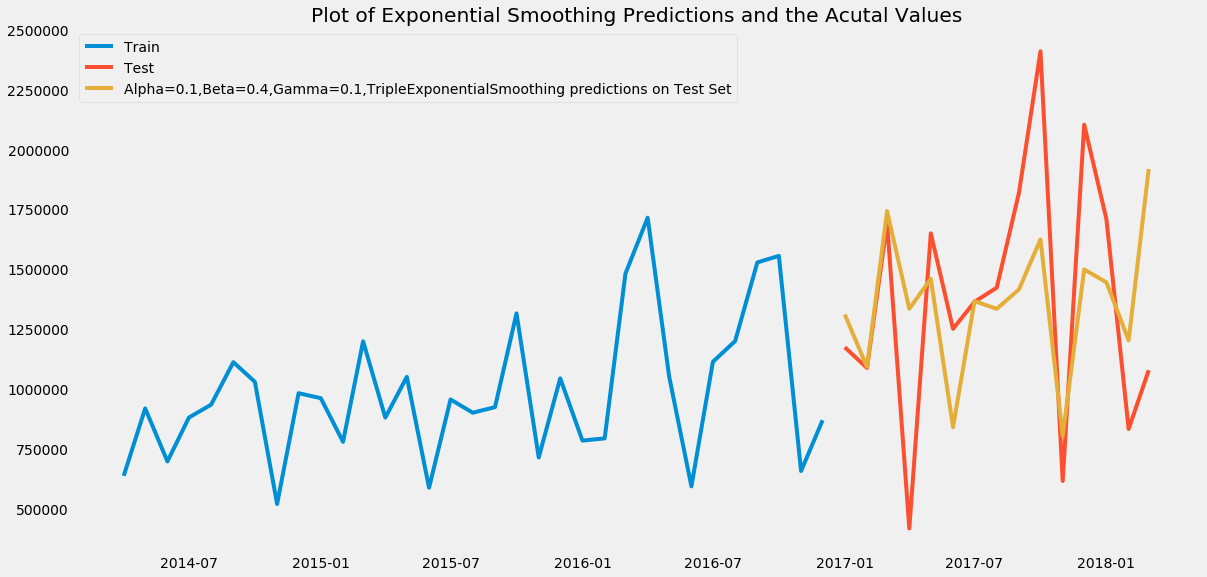

In [241]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.1000000000000000, 0.4000000000000000, 0.1], label='Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [242]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.1,0.4,0.1])
print('\nMAPE:',mape)


MAPE: 35.84708623293296


In [243]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,655066.858867,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",603475.647309,39.523562
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",513241.397371,34.058813
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",459600.588656,35.847086


In [244]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",459600.588656,35.847086
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",513241.397371,34.058813
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",603475.647309,39.523562
Simple Average,655066.858867,NaN


In [245]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

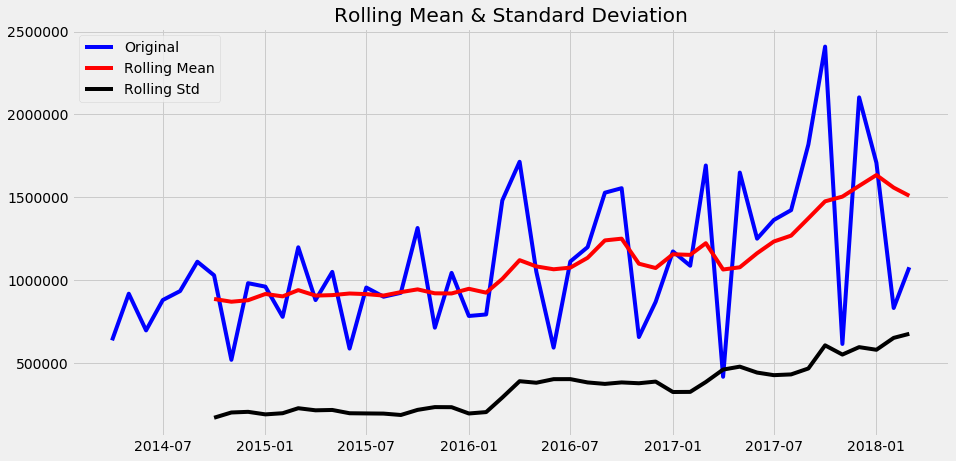

Results of Dickey-Fuller Test:
Test Statistic                -6.228994e+00
p-value                        5.006857e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [246]:
test_stationarity(OTG['sales'])

In [247]:
#test_stationarity(OTG['sales'].diff().dropna())

In [248]:
#test_stationarity(OTG['sales'].diff(periods=2).dropna())

In [249]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [125]:
from statsmodels.tsa.stattools import adfuller

In [250]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [251]:

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [252]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:1010.6685120725219
ARIMA(0, 0, 1) - AIC:928.1906571007833
ARIMA(0, 0, 2) - AIC:929.5096176520818
ARIMA(0, 0, 3) - AIC:931.9619551845966
ARIMA(1, 0, 0) - AIC:928.4504178412412
ARIMA(1, 0, 1) - AIC:927.662058926775
ARIMA(1, 0, 2) - AIC:929.8440426987657
ARIMA(1, 0, 3) - AIC:929.0576583128822
ARIMA(2, 0, 0) - AIC:929.4149871414629
ARIMA(2, 0, 1) - AIC:931.1942795981763
ARIMA(2, 0, 2) - AIC:931.2901017013246
ARIMA(2, 0, 3) - AIC:930.1226311849642
ARIMA(3, 0, 0) - AIC:930.9712873713735
ARIMA(3, 0, 1) - AIC:932.9650295393735
ARIMA(3, 0, 2) - AIC:926.7555460631434
ARIMA(3, 0, 3) - AIC:929.1318581377188


In [253]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 2)",926.755546
5,"(1, 0, 1)",927.662059
1,"(0, 0, 1)",928.190657
4,"(1, 0, 0)",928.450418
7,"(1, 0, 3)",929.057658


In [254]:
auto_ARIMA = ARIMA(train['sales'], order=(3,0,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -456.378
Date:                Sat, 21 Aug 2021   AIC                            926.756
Time:                        17:35:07   BIC                            937.231
Sample:                    04-01-2014   HQIC                           930.280
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.802e+05   1.06e+05      9.215      0.000    7.72e+05    1.19e+06
ar.L1          1.5017      0.224      6.702      0.000       1.063       1.941
ar.L2         -1.1569      0.316     -3.659      0.0

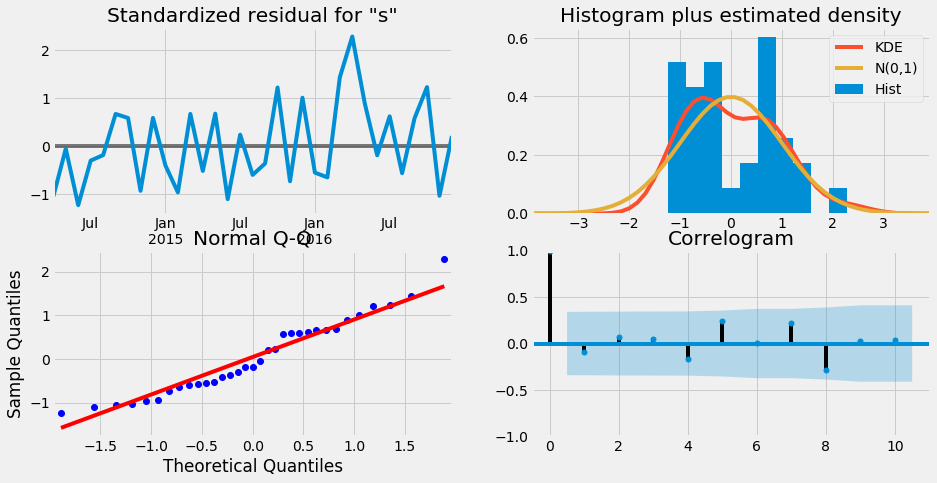

In [255]:
results_auto_ARIMA.plot_diagnostics();

In [256]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [257]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [258]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 643503.4111700468 
MAPE: 39.52000785398485


In [259]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(3,0,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,655066.858867,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",602882.754251,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",603475.647309,39.523562
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",527973.956244,45.421219
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",513241.397371,34.058813
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",459600.588656,35.847086
"ARIMA(3,0,2)",35.847086,39.520008


In [260]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [261]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [262]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:978.9866348413606
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:655.6945971717679
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:225.02642325033634
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:585.3259089714331
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:558.7520237814401
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:227.02642118386078
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:259.10199453352124
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:254.10203310226336
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:229.02638643910308
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:931.4729586686406
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:570.1130021827861
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:214.72066724818032
SARIMA(0, 0, 1)x(0, 0, 

SARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:179.2378178517023
SARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:536.6824110113445
SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:515.2691888721322
SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:177.15036346735764
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:203.71353936692333
SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:206.02475324612826
SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:181.6493912035295
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:818.3543333682617
SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:484.84794156293464
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:151.54825817715962
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:539.5526695953237
SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - A

In [263]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
3,"(0, 0, 0)","(0, 0, 3, 12)",8.0
12,"(0, 0, 0)","(3, 0, 0, 12)",8.0
67,"(1, 0, 0)","(0, 0, 3, 12)",10.0
28,"(0, 0, 1)","(3, 0, 0, 12)",10.0
7,"(0, 0, 0)","(1, 0, 3, 12)",10.0


In [264]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,0,0),
                                seasonal_order=(0,0,3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                   33
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                          Sat, 21 Aug 2021   AIC                              8.000
Time:                                  17:36:46   BIC                                nan
Sample:                              04-01-2014   HQIC                               nan
                                   - 12-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        

In [265]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [266]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,0.0,275601.229265,-540168.483454,540168.483454
2017-02-01,0.0,275601.229265,-540168.483454,540168.483454
2017-03-01,0.0,275601.229265,-540168.483454,540168.483454
2017-04-01,0.0,275601.229265,-540168.483454,540168.483454
2017-05-01,0.0,275599.415044,-540164.927646,540164.927646


In [267]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2163086694037.9333 
MAPE: 100.0


In [268]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(0,0,3)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.550669e+05,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",6.028828e+05,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",6.034756e+05,39.523562
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",5.132414e+05,34.058813
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",4.596006e+05,35.847086
"ARIMA(3,0,2)",3.584709e+01,39.520008
"SARIMA(0,0,0)(0,0,3)12",2.163087e+12,100.000000


In [270]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(3,0,2)",3.584709e+01,39.520008
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",4.596006e+05,35.847086
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",5.132414e+05,34.058813
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.1661,SimpleExponentialSmoothing",6.028828e+05,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",6.034756e+05,39.523562
Simple Average,6.550669e+05,NaN
"SARIMA(0,0,0)(0,0,3)12",2.163087e+12,100.000000


In [271]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [272]:
OTG.head()

,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Mumbai,636594
2014-05-01,Oven Toaster Grill,Mumbai,918205
2014-06-01,Oven Toaster Grill,Mumbai,696779
2014-07-01,Oven Toaster Grill,Mumbai,879976
2014-08-01,Oven Toaster Grill,Mumbai,933985


In [273]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(OTG1['date'])
df_prophet['y'] =OTG1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,614997
2017-12-01,2017-12-01,2103019
2018-01-01,2018-01-01,1708193
2018-02-01,2018-02-01,831972
2018-03-01,2018-03-01,1077551


In [274]:
df_prophet.shape

(48, 2)

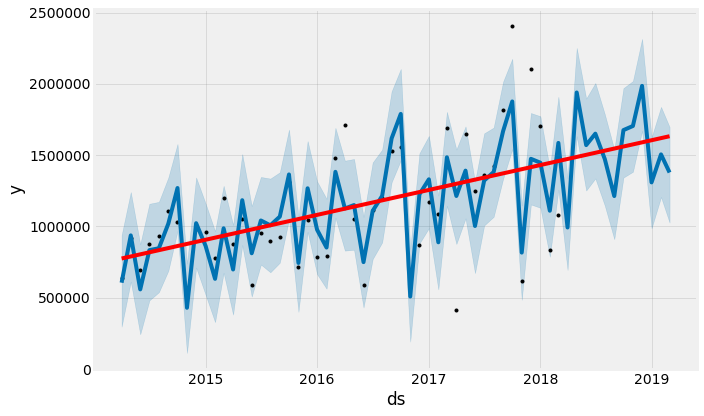

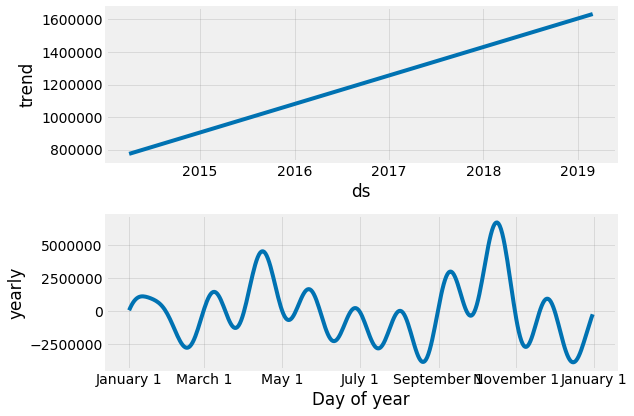

In [275]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [276]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,7.752730e+05,2.970250e+05,9.385292e+05,7.752730e+05,7.752730e+05,-169755.472014,-169755.472014,-169755.472014,-169755.472014,-169755.472014,-169755.472014,0.0,0.0,0.0,6.055175e+05
1,2014-05-01,7.896173e+05,6.135489e+05,1.241131e+06,7.896173e+05,7.896173e+05,147803.743047,147803.743047,147803.743047,147803.743047,147803.743047,147803.743047,0.0,0.0,0.0,9.374211e+05
2,2014-06-01,8.044398e+05,2.436527e+05,8.752388e+05,8.044398e+05,8.044398e+05,-246006.593368,-246006.593368,-246006.593368,-246006.593368,-246006.593368,-246006.593368,0.0,0.0,0.0,5.584333e+05
3,2014-07-01,8.187842e+05,4.818956e+05,1.159292e+06,8.187842e+05,8.187842e+05,15161.332188,15161.332188,15161.332188,15161.332188,15161.332188,15161.332188,0.0,0.0,0.0,8.339456e+05
4,2014-08-01,8.336067e+05,5.387660e+05,1.172610e+06,8.336067e+05,8.336067e+05,13482.731526,13482.731526,13482.731526,13482.731526,13482.731526,13482.731526,0.0,0.0,0.0,8.470895e+05
5,2014-09-01,8.484293e+05,6.899993e+05,1.343446e+06,8.484293e+05,8.484293e+05,171508.120116,171508.120116,171508.120116,171508.120116,171508.120116,171508.120116,0.0,0.0,0.0,1.019937e+06
6,2014-10-01,8.627736e+05,9.680730e+05,1.578495e+06,8.627736e+05,8.627736e+05,406892.435934,406892.435934,406892.435934,406892.435934,406892.435934,406892.435934,0.0,0.0,0.0,1.269666e+06
7,2014-11-01,8.775962e+05,1.128805e+05,7.396509e+05,8.775962e+05,8.775962e+05,-448026.237042,-448026.237042,-448026.237042,-448026.237042,-448026.237042,-448026.237042,0.0,0.0,0.0,4.295699e+05
8,2014-12-01,8.919405e+05,7.116171e+05,1.343781e+06,8.919405e+05,8.919405e+05,131170.824467,131170.824467,131170.824467,131170.824467,131170.824467,131170.824467,0.0,0.0,0.0,1.023111e+06
9,2015-01-01,9.067631e+05,5.206617e+05,1.160839e+06,9.067631e+05,9.067631e+05,-42915.226509,-42915.226509,-42915.226509,-42915.226509,-42915.226509,-42915.226509,0.0,0.0,0.0,8.638478e+05


In [277]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

233390454500.39145


In [278]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.550669e+05,NaN
"Alpha=0.1661,SimpleExponentialSmoothing",6.028828e+05,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",6.034756e+05,39.523562
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",5.132414e+05,34.058813
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",4.596006e+05,35.847086
"ARIMA(3,0,2)",3.584709e+01,39.520008
"SARIMA(0,0,0)(0,0,3)12",2.163087e+12,100.000000
Prophet,2.333905e+11,NaN


In [279]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(3,0,2)",3.584709e+01,39.520008
"Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing",4.596006e+05,35.847086
"Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",5.132414e+05,34.058813
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",5.279740e+05,45.421219
"Alpha=0.1661,SimpleExponentialSmoothing",6.028828e+05,38.983203
"Alpha=0.2,SimpleExponentialSmoothing",6.034756e+05,39.523562
Simple Average,6.550669e+05,NaN
Prophet,2.333905e+11,NaN
"SARIMA(0,0,0)(0,0,3)12",2.163087e+12,100.000000


In [280]:
import fbprophet

In [281]:
m = fbprophet.Prophet()

In [282]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [283]:
future = m.make_future_dataframe(periods=365)

In [284]:
forecast = m.predict(future)

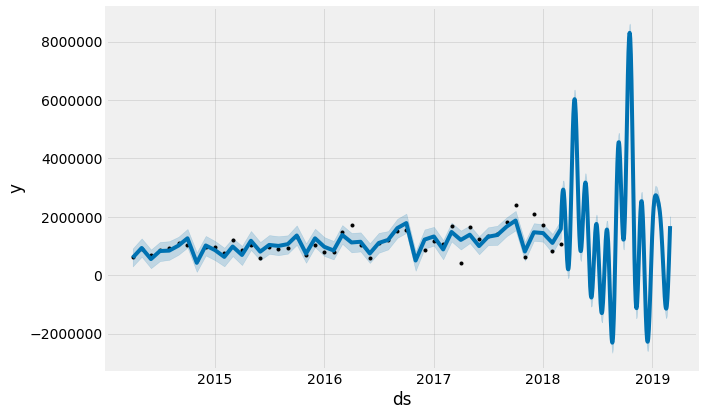

In [285]:
m.plot(forecast);

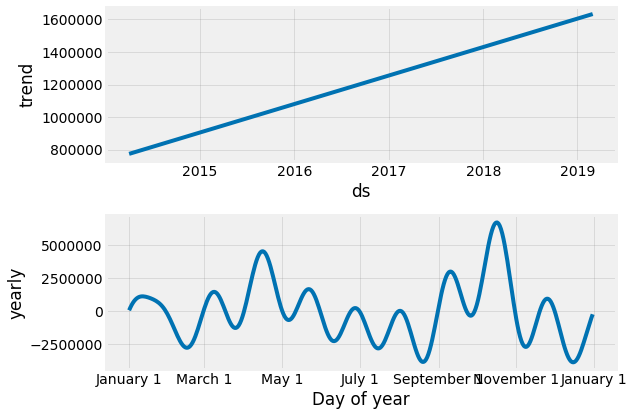

In [286]:
m.plot_components(forecast);

In [287]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,636594
2014-05-01,2014-05-01,918205
2014-06-01,2014-06-01,696779
2014-07-01,2014-07-01,879976
2014-08-01,2014-08-01,933985


In [288]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [289]:
predict=m.predict(future)

In [290]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,7.752730e+05,2.773780e+05,9.436852e+05,7.752730e+05,7.752730e+05,-1.697555e+05,-1.697555e+05,-1.697555e+05,-1.697555e+05,-1.697555e+05,-1.697555e+05,0.0,0.0,0.0,6.055175e+05
1,2014-05-01,7.896173e+05,6.112682e+05,1.265628e+06,7.896173e+05,7.896173e+05,1.478037e+05,1.478037e+05,1.478037e+05,1.478037e+05,1.478037e+05,1.478037e+05,0.0,0.0,0.0,9.374211e+05
2,2014-06-01,8.044398e+05,2.124353e+05,9.140655e+05,8.044398e+05,8.044398e+05,-2.460066e+05,-2.460066e+05,-2.460066e+05,-2.460066e+05,-2.460066e+05,-2.460066e+05,0.0,0.0,0.0,5.584333e+05
3,2014-07-01,8.187842e+05,5.197674e+05,1.169628e+06,8.187842e+05,8.187842e+05,1.516133e+04,1.516133e+04,1.516133e+04,1.516133e+04,1.516133e+04,1.516133e+04,0.0,0.0,0.0,8.339456e+05
4,2014-08-01,8.336067e+05,5.219127e+05,1.161739e+06,8.336067e+05,8.336067e+05,1.348273e+04,1.348273e+04,1.348273e+04,1.348273e+04,1.348273e+04,1.348273e+04,0.0,0.0,0.0,8.470895e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,1.631632e+06,9.224404e+04,7.266403e+05,1.631632e+06,1.631632e+06,-1.193696e+06,-1.193696e+06,-1.193696e+06,-1.193696e+06,-1.193696e+06,-1.193696e+06,0.0,0.0,0.0,4.379363e+05
409,2019-02-26,1.632110e+06,4.249228e+05,1.060180e+06,1.632110e+06,1.632110e+06,-8.848440e+05,-8.848440e+05,-8.848440e+05,-8.848440e+05,-8.848440e+05,-8.848440e+05,0.0,0.0,0.0,7.472663e+05
410,2019-02-27,1.632588e+06,7.470061e+05,1.382333e+06,1.632588e+06,1.632588e+06,-5.694181e+05,-5.694181e+05,-5.694181e+05,-5.694181e+05,-5.694181e+05,-5.694181e+05,0.0,0.0,0.0,1.063170e+06
411,2019-02-28,1.633067e+06,1.043840e+06,1.671009e+06,1.633067e+06,1.633067e+06,-2.545732e+05,-2.545732e+05,-2.545732e+05,-2.545732e+05,-2.545732e+05,-2.545732e+05,0.0,0.0,0.0,1.378493e+06


In [291]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,605517.477994,277377.955545,9.436852e+05
1,2014-05-01,937421.068337,611268.185757,1.265628e+06
2,2014-06-01,558433.253047,212435.257369,9.140655e+05
3,2014-07-01,833945.553885,519767.403640,1.169628e+06
4,2014-08-01,847089.474349,521912.681318,1.161739e+06


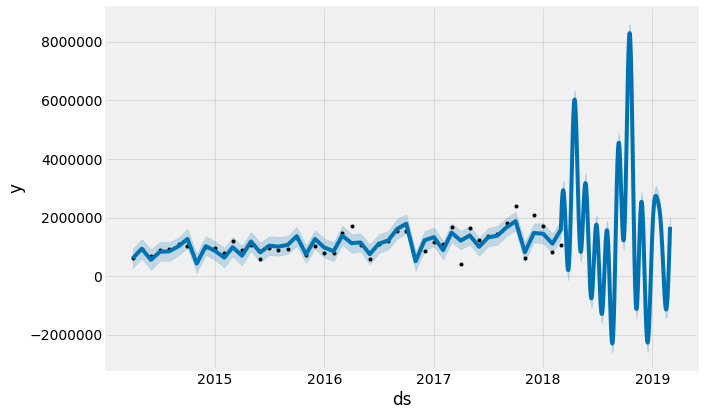

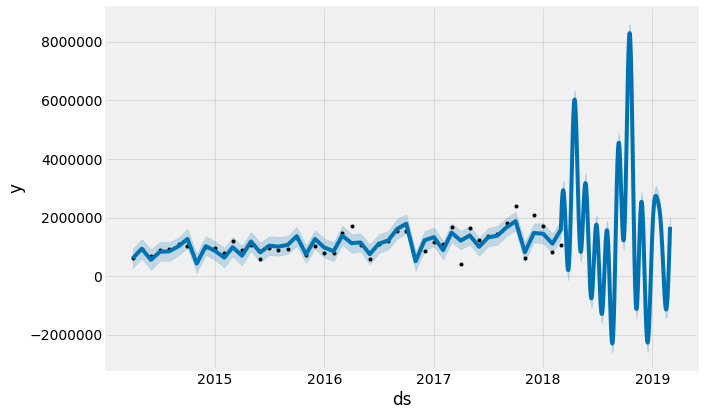

In [292]:
m.plot(predict)

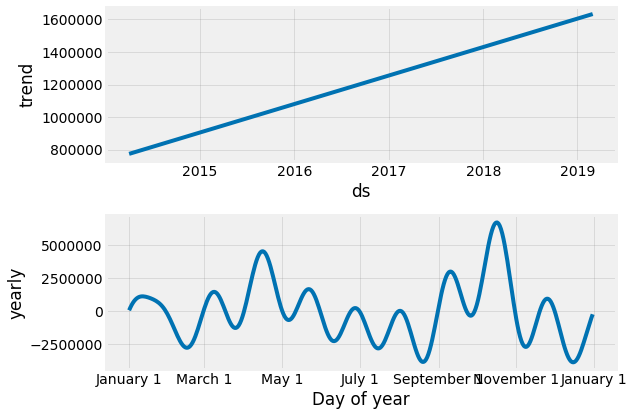

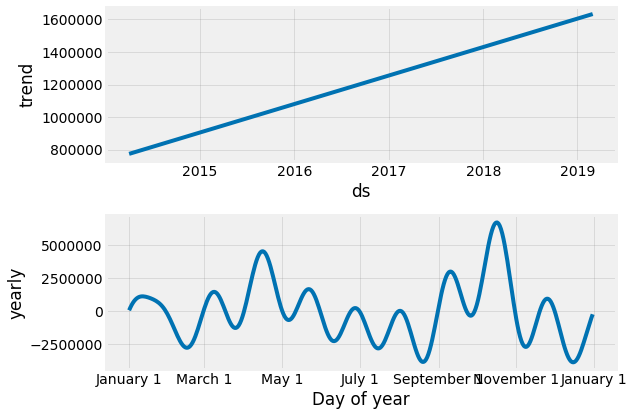

In [293]:
m.plot_components(predict)

In [294]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [295]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.051208e+06,9.315026e+05,1.174921e+06,1555027,2016-09-02
1,2016-11-01,6.867929e+05,5.661070e+05,7.983993e+05,656638,2016-09-02
2,2016-12-01,1.247084e+06,1.132583e+06,1.365215e+06,868642,2016-09-02
3,2017-01-01,1.447773e+06,1.326747e+06,1.559228e+06,1173440,2016-09-02
4,2017-02-01,4.877036e+05,3.671476e+05,6.080745e+05,1087030,2016-09-02


In [296]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,7.170804e+11,846805.981373,795123.822853,1.464935,1.464935,0.0
1,60 days,5.906182e+11,768516.894254,558291.757417,1.325899,1.325899,0.5
2,61 days,8.874266e+10,297897.056029,225182.186519,0.150361,0.150361,0.5
3,90 days,1.598970e+11,399871.275597,399325.555696,0.345235,0.345235,0.0
4,92 days,1.522265e+11,390162.127643,389991.147215,0.378402,0.378402,0.0


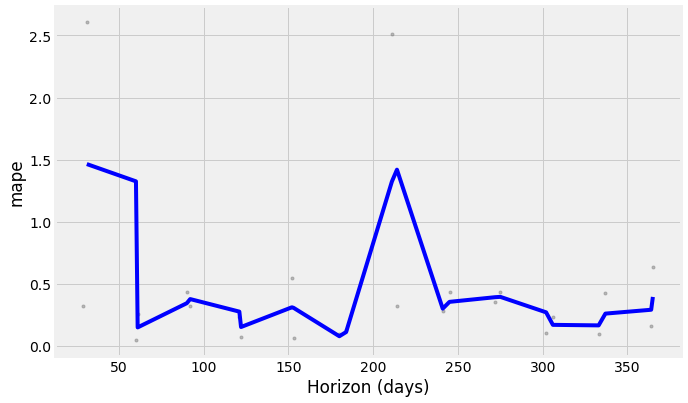

In [297]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [298]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(OTG['sales'], (3,0,2)).fit()

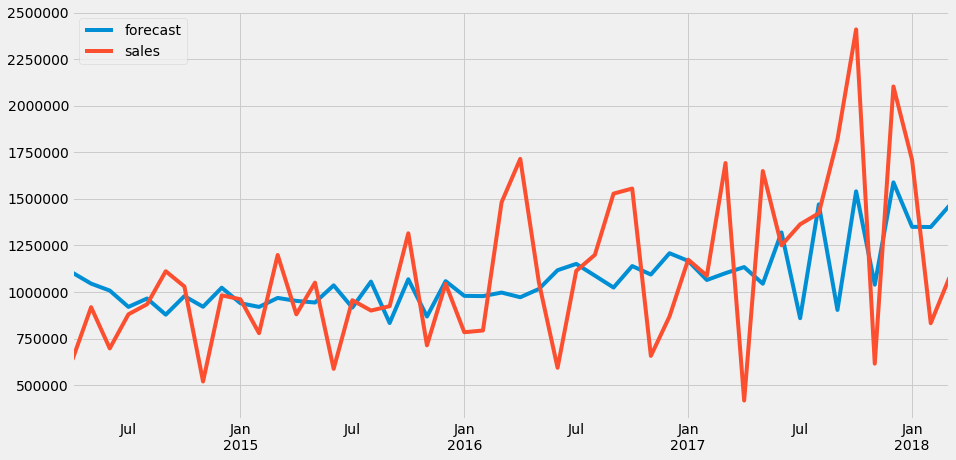

In [299]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [300]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(OTG.sales, order=(3,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(3, 2)   Log Likelihood                -685.162
Method:                       css-mle   S.D. of innovations         372854.915
Date:                Sat, 21 Aug 2021   AIC                           1384.324
Time:                        17:38:41   BIC                           1397.423
Sample:                    04-01-2014   HQIC                          1389.274
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.103e+06   1.55e+05      7.105      0.000    7.99e+05    1.41e+06
ar.L1.sales    -0.1300      0.191     -0.679      0.497      -0.505       0.245
ar.L2.sales     0.7609      0.120      6.335    

In [301]:
from statsmodels.tsa.stattools import acf

# Create Training and Test

train = OTG.sales[:33]
test = OTG.sales[33:]

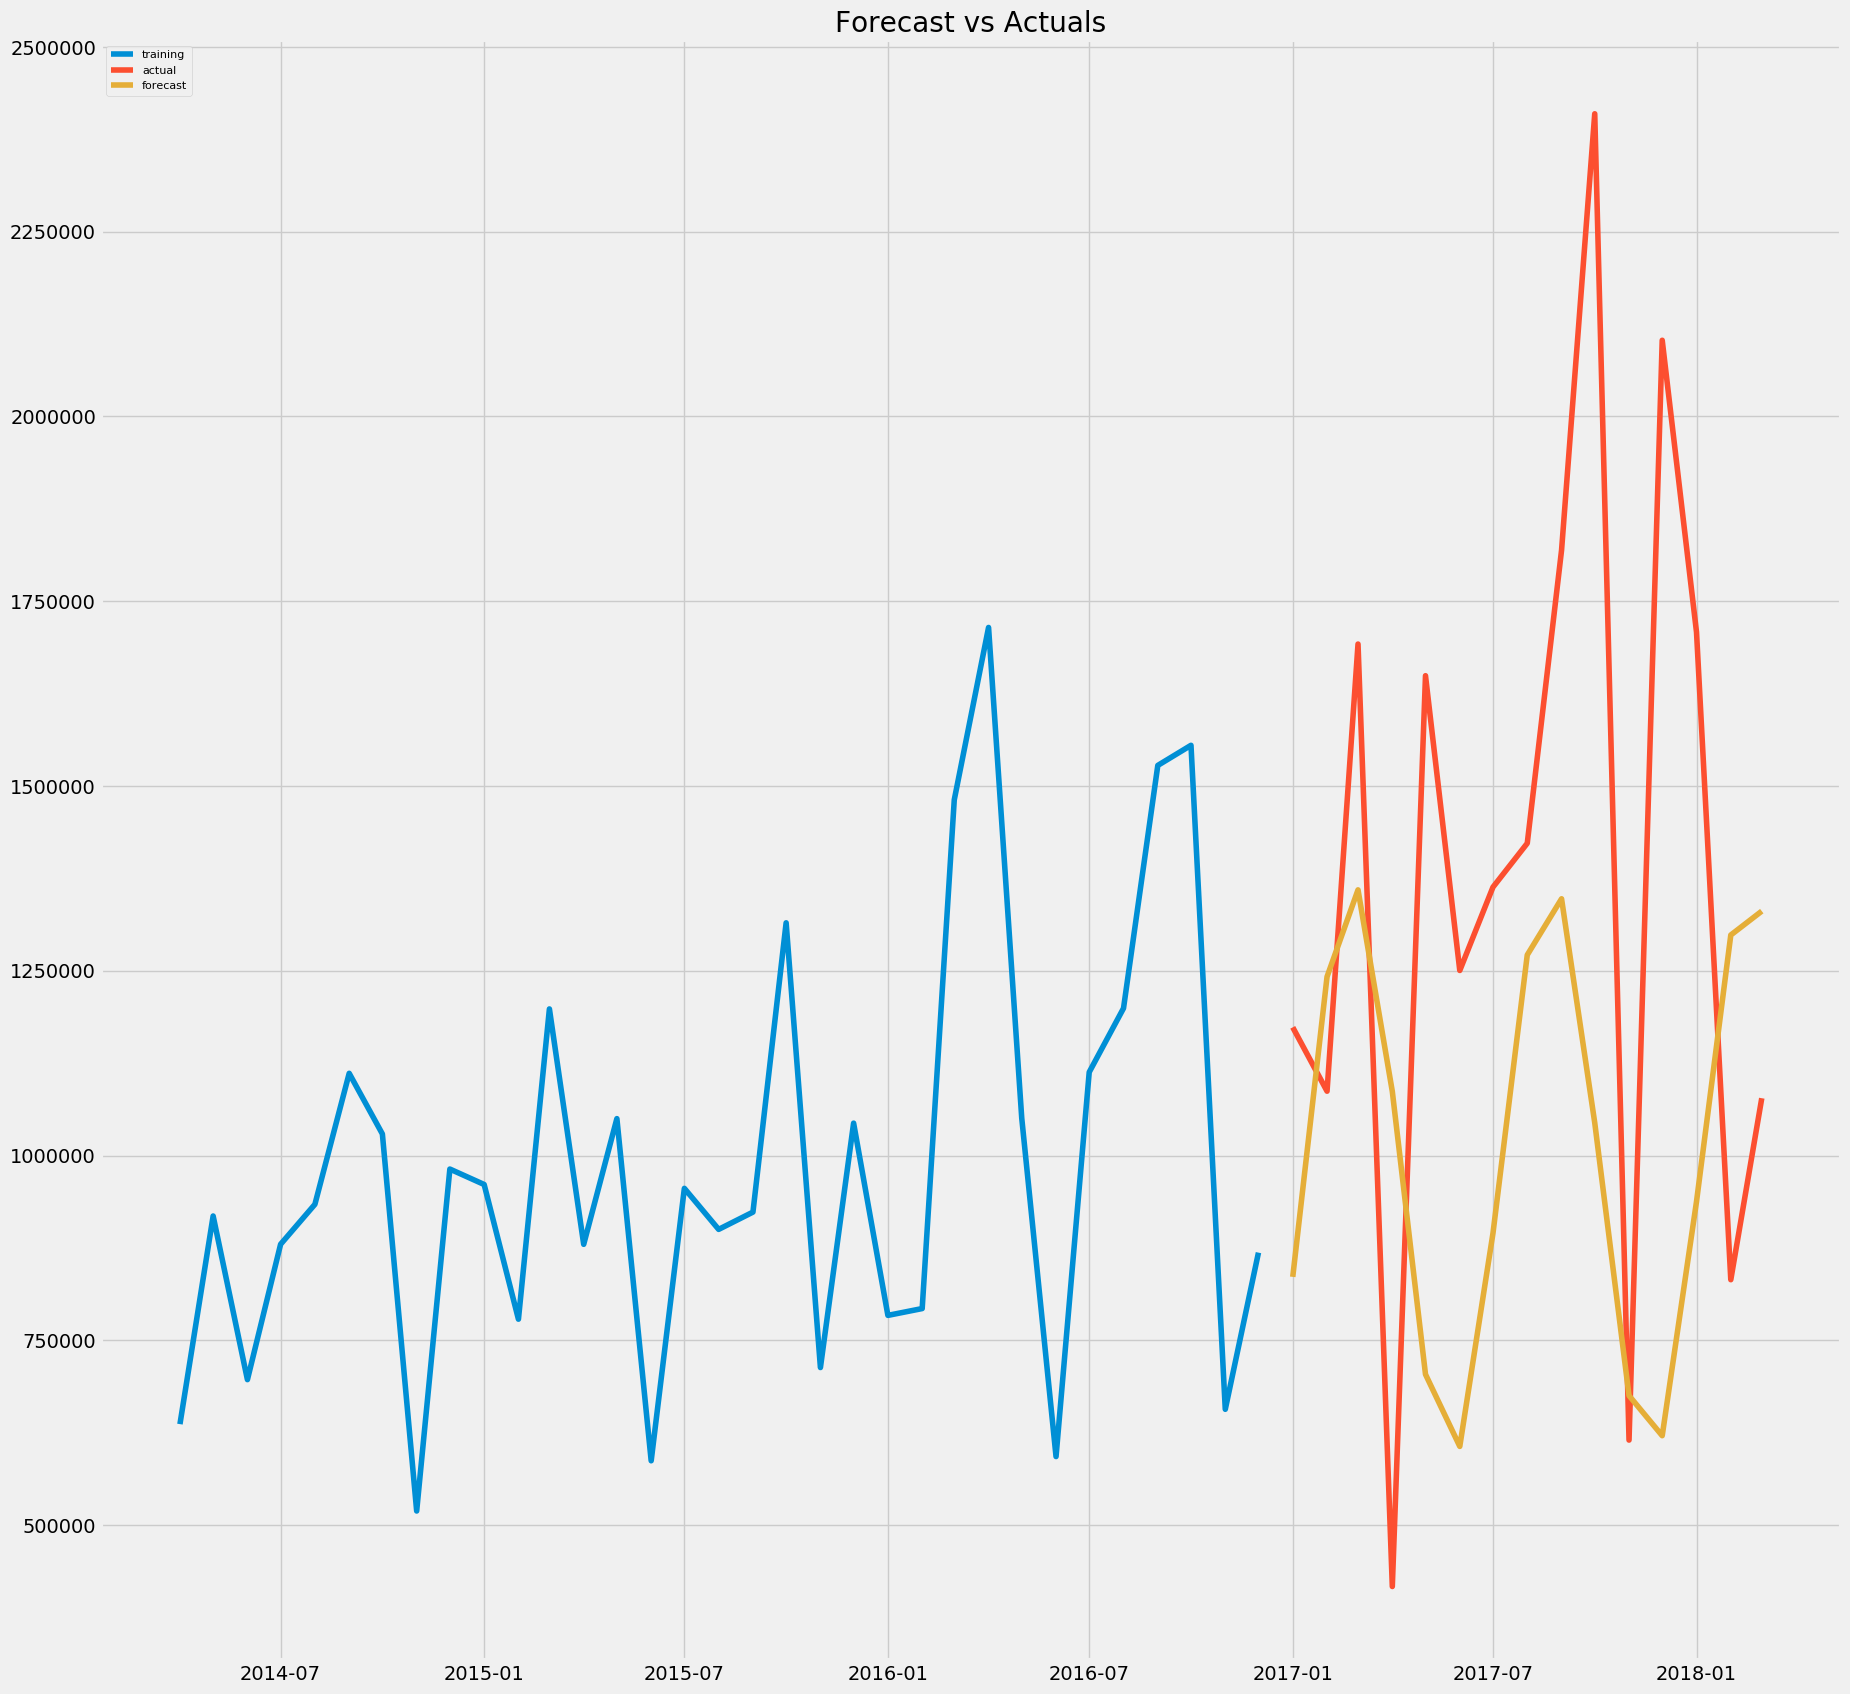

In [302]:
model = ARIMA(train, order=(3,0,2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()